In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models

import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


# Explore the Data

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
First training label: 6


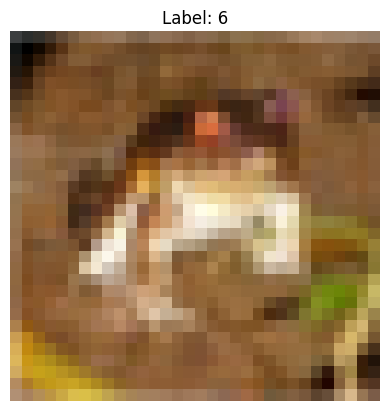

In [ ]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("First training label:", train_labels[0][0])

# Visualizar una imagen
plt.imshow(train_images[0])  # No se necesita cmap, las imágenes son en color
plt.title(f"Label: {train_labels[0][0]}")
plt.axis("off")
plt.show()

# Preprocess the Data

### Neural networks learn better with normalized inputs. Flattening is needed for a basic fully-connected model.

In [ ]:
# Normalizar valores de píxeles a rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Aplanar imágenes: de (32, 32, 3) a (3072,)
train_images = train_images.reshape((train_images.shape[0], 32 * 32 * 3))
test_images = test_images.reshape((test_images.shape[0], 32 * 32 * 3))


# Build the model

### Dense means a fully connected layer.

### First layer has 128 neurons with ReLU activation.

### Output layer has 10 neurons (for digits 0–9) with softmax to output probabilities.

In [ ]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(32*32*3,)),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

### Adam optimizer adjusts weights during training.sparse_categorical_crossentropy is used for integer labels. Accuracy helps evaluate the model.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the Model

### Trains the model for 5 passes (epochs) over the entire training set.
### Batch size 32 means weights are updated every 32 samples.

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2108 - loss: 2.1598
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3255 - loss: 1.8959
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3478 - loss: 1.8401
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3657 - loss: 1.7983
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3829 - loss: 1.7639


# Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3911 - loss: 1.7457
Test accuracy: 0.3833000063896179


In [ ]:
predictions = model.predict(test_images)
print("Prediction for first test image:", np.argmax(predictions[0]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prediction for first test image: 3
